# MLP experience

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import os
import soundata
import librosa
import soundfile as sf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

## 1. Model Architecture

In [49]:
def create_model_0(input_shape, learning_rate=0.0001):
    """Basic MLP with 2 hidden layers (64 -> 32)"""
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

def create_model_1(input_shape, learning_rate=0.0001):
    """Basic MLP with 2 hidden layers (128 -> 64)"""
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

def create_model_2(input_shape, learning_rate=0.0001):
    """Deeper MLP with 3 hidden layers (256 -> 128 -> 64)"""
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

def create_model_3(input_shape, learning_rate=0.0001):
    """Wide MLP with 2 hidden layers (512 -> 256)"""
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

def create_model_4(input_shape, learning_rate=0.0001):
    """Deep and narrow MLP with 4 hidden layers (128 -> 96 -> 64 -> 32)"""
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(96, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

def create_model_5(input_shape, learning_rate=0.0001):
    """Pyramid-shaped MLP with gradually decreasing layer sizes"""
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

def create_model_6(input_shape, learning_rate=0.0001):
    """Bottleneck architecture with compression and expansion"""
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),   # Bottleneck
        tf.keras.layers.Dense(128, activation='relu'),  # Expansion
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

In [36]:
def load_and_prepare_data():
    """Load features and labels from saved CSV files."""
    features = []
    labels = []

    for fold in range(1, 11):
        data = pd.read_csv(f'features_mlp/fold{fold}_features_normalized.csv')
        features.append(data.iloc[:, :172].values)  # First 172 columns are features
        labels.append(data['label'].values)

    return features, labels

def evaluate_first_fold(model_function, features, labels, model_name="Model", epochs=30, batch_size=32, seed=42):
   tf.keras.backend.clear_session()
   tf.random.set_seed(seed)
   
   # Using folds 1-8 for training, 9 for validation
   train_folds = list(range(8))
   val_fold = 8  # Fold 9
   
   train_features = np.concatenate([features[f] for f in train_folds])
   train_labels = np.concatenate([labels[f] for f in train_folds])
   val_features = features[val_fold]
   val_labels = labels[val_fold]
   
   model = model_function(train_features.shape[1])
   
   history = model.fit(
       train_features, train_labels,
       epochs=epochs,
       batch_size=batch_size,
       validation_data=(val_features, val_labels),
       verbose=1
   )
   
   plt.figure(figsize=(12, 4))
   
   # Loss plot
   plt.subplot(1, 2, 1)
   plt.plot(history.history['loss'], label='Training Loss')
   plt.plot(history.history['val_loss'], label='Validation Loss')
   plt.title(f'{model_name} - Model Loss')
   plt.xlabel('Epoch')
   plt.ylabel('Loss')
   plt.legend()
   
   # Accuracy plot
   plt.subplot(1, 2, 2)
   plt.plot(history.history['accuracy'], label='Training Accuracy')
   plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
   plt.title(f'{model_name} - Model Accuracy')
   plt.xlabel('Epoch')
   plt.ylabel('Accuracy')
   plt.legend()
   
   plt.tight_layout()
   plt.show()
   
   final_val_acc = history.history['val_accuracy'][-1]
   final_val_loss = history.history['val_loss'][-1]
   print(f"\nFinal Validation Metrics:")
   print(f"Validation Accuracy: {final_val_acc:.4f}")
   print(f"Validation Loss: {final_val_loss:.4f}")
   
   return history

Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2008 - loss: 2.3200 - val_accuracy: 0.4167 - val_loss: 1.8508
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4046 - loss: 1.7552 - val_accuracy: 0.4963 - val_loss: 1.5654
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.4990 - loss: 1.4803 - val_accuracy: 0.5490 - val_loss: 1.4099
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.5699 - loss: 1.3019 - val_accuracy: 0.5735 - val_loss: 1.3139
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.6232 - loss: 1.1733 - val_accuracy: 0.5846 - val_loss: 1.2513
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.6535 - loss: 1.0750 - val_accuracy: 0.6005 - val_loss: 1.2056
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.6852 - loss: 0.9947 - val_accuracy: 0.6176 - val_loss: 1.1728
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7071 - loss: 0.9277 - val_ac

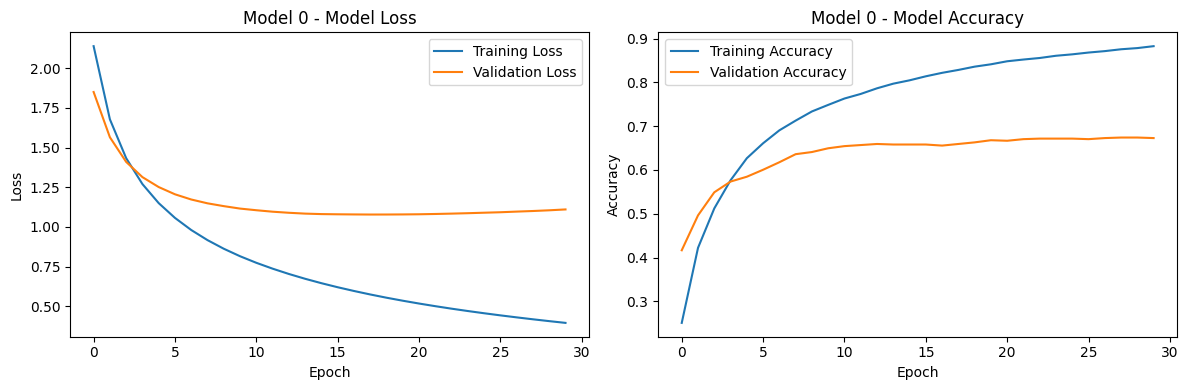


Final Validation Metrics:
Validation Accuracy: 0.6728
Validation Loss: 1.1101


In [38]:
features, labels = load_and_prepare_data()

results_model0 = evaluate_first_fold(create_model_0, features, labels, "Model 0")

Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4812 - loss: 1.4926 - val_accuracy: 0.6348 - val_loss: 1.2029
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.7988 - loss: 0.6074 - val_accuracy: 0.6556 - val_loss: 1.1989
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8732 - loss: 0.4111 - val_accuracy: 0.6618 - val_loss: 1.2944
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9090 - loss: 0.3029 - val_accuracy: 0.6679 - val_loss: 1.3874
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.9330 - loss: 0.2289 - val_accuracy: 0.6569 - val_loss: 1.4776
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9525 - loss: 0.1723 - val_accuracy: 0.6434 - val_loss: 1.6154
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.9692 - loss: 0.1284 - val_accuracy: 0.6287 - val_loss: 1.7364
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.9783 - loss: 0.0964 - val_accu

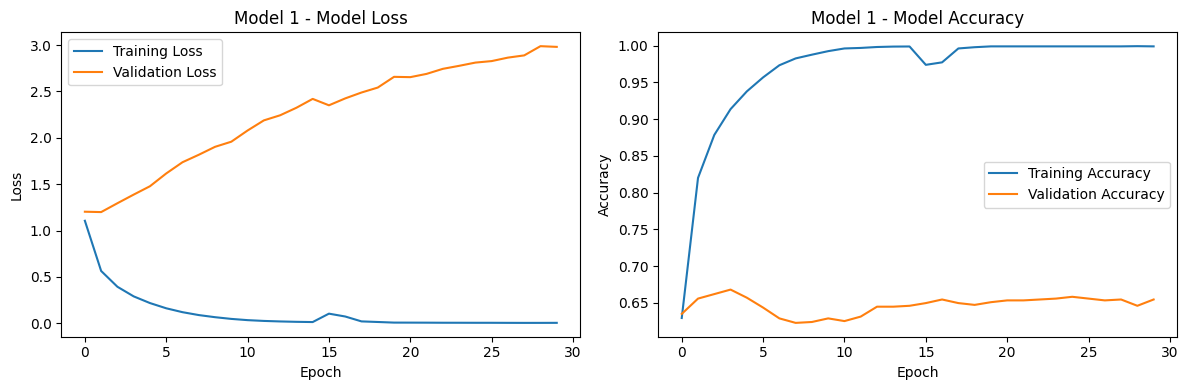


Final Validation Metrics:
Validation Accuracy: 0.6544
Validation Loss: 2.9803


In [50]:
features, labels = load_and_prepare_data()

results_model1 = evaluate_first_fold(create_model_1, features, labels, "Model 1")

Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2427 - loss: 2.0861 - val_accuracy: 0.4816 - val_loss: 1.4053
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6058 - loss: 1.2232 - val_accuracy: 0.5637 - val_loss: 1.2092
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7188 - loss: 0.9079 - val_accuracy: 0.5895 - val_loss: 1.1616
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7788 - loss: 0.7369 - val_accuracy: 0.6042 - val_loss: 1.1451
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8114 - loss: 0.6227 - val_accuracy: 0.6189 - val_loss: 1.1335
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8428 - loss: 0.5386 - val_accuracy: 0.6189 - val_loss: 1.1265
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8638 - loss: 0.4735 - val_accuracy: 0.6201 - val_loss: 1.1236
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8784 - loss: 0.4203 - val_accuracy: 0.

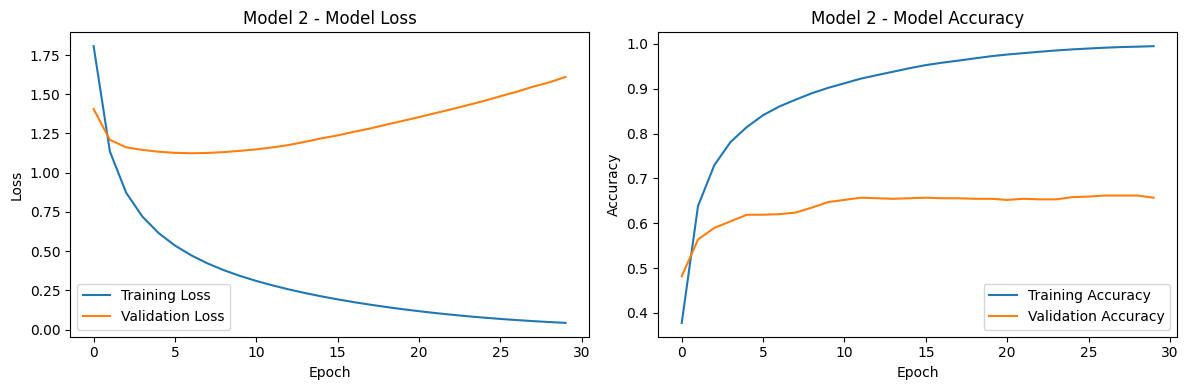


Final Validation Metrics:
Validation Accuracy: 0.6569
Validation Loss: 1.6102


In [40]:
features, labels = load_and_prepare_data()

results_model2 = evaluate_first_fold(create_model_2, features, labels, "Model 2")

Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3937 - loss: 1.7839 - val_accuracy: 0.5441 - val_loss: 1.2371
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7265 - loss: 0.9175 - val_accuracy: 0.6250 - val_loss: 1.1089
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7907 - loss: 0.6868 - val_accuracy: 0.6483 - val_loss: 1.0643
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8320 - loss: 0.5581 - val_accuracy: 0.6593 - val_loss: 1.0510
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8608 - loss: 0.4714 - val_accuracy: 0.6642 - val_loss: 1.0501
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8841 - loss: 0.4060 - val_accuracy: 0.6703 - val_loss: 1.0591
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9019 - loss: 0.3535 - val_accuracy: 0.6728 - val_loss: 1.0744
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9170 - loss: 0.3102 - val_accuracy: 0.

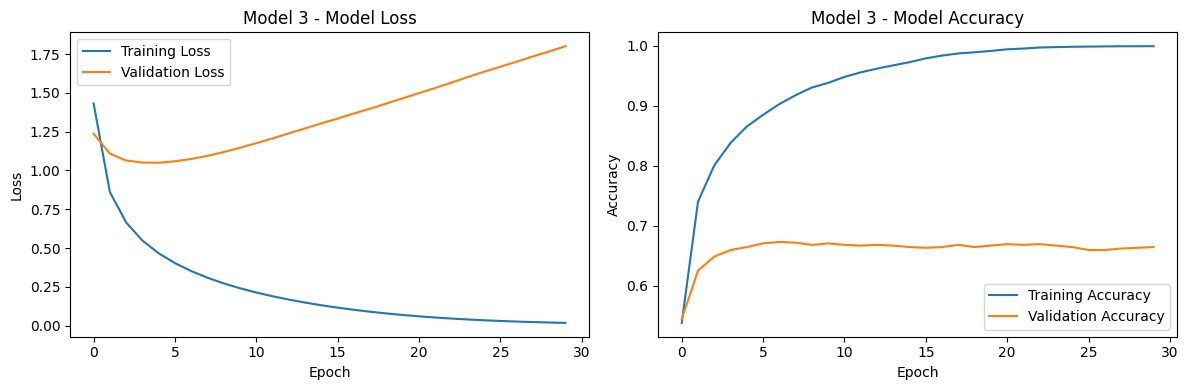


Final Validation Metrics:
Validation Accuracy: 0.6642
Validation Loss: 1.8014


In [41]:
features, labels = load_and_prepare_data()

results_model3 = evaluate_first_fold(create_model_3, features, labels, "Model 3")

Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1641 - loss: 2.2152 - val_accuracy: 0.3627 - val_loss: 1.8490
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.5121 - loss: 1.6500 - val_accuracy: 0.5123 - val_loss: 1.4087
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.6154 - loss: 1.2005 - val_accuracy: 0.5686 - val_loss: 1.2202
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7037 - loss: 0.9494 - val_accuracy: 0.6017 - val_loss: 1.1495
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.7518 - loss: 0.8030 - val_accuracy: 0.6189 - val_loss: 1.1124
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.7802 - loss: 0.7045 - val_accuracy: 0.6373 - val_loss: 1.0935
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.8092 - loss: 0.6306 - val_accuracy: 0.6422 - val_loss: 1.0886
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.8272 - loss: 0.5720 - val

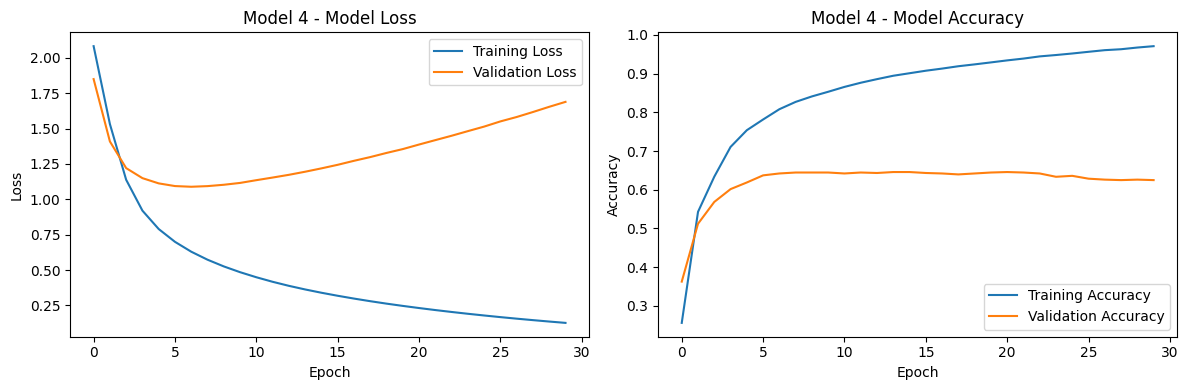


Final Validation Metrics:
Validation Accuracy: 0.6250
Validation Loss: 1.6882


In [21]:
features, labels = load_and_prepare_data()

results_model4 = evaluate_first_fold(create_model_4, features, labels, "Model 4")

Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2474 - loss: 2.1117 - val_accuracy: 0.4314 - val_loss: 1.5200
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5671 - loss: 1.3149 - val_accuracy: 0.5515 - val_loss: 1.2244
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6936 - loss: 0.9582 - val_accuracy: 0.5784 - val_loss: 1.1417
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7681 - loss: 0.7636 - val_accuracy: 0.6054 - val_loss: 1.1147
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.8096 - loss: 0.6391 - val_accuracy: 0.6238 - val_loss: 1.1076
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.8362 - loss: 0.5501 - val_accuracy: 0.6422 - val_loss: 1.1139
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.8622 - loss: 0.4814 - val_accuracy: 0.6483 - val_loss: 1.1286
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.8820 - loss: 0.4254 - val_accu

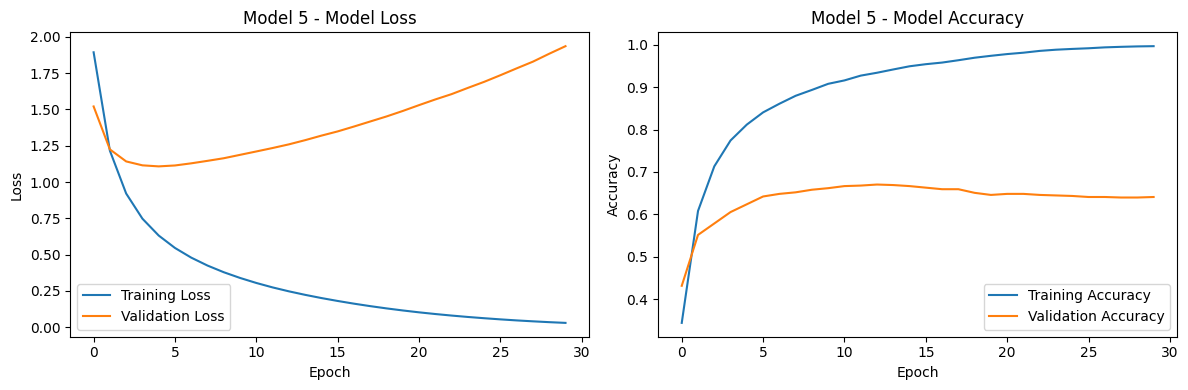


Final Validation Metrics:
Validation Accuracy: 0.6409
Validation Loss: 1.9348


In [42]:
features, labels = load_and_prepare_data()

results_model5 = evaluate_first_fold(create_model_5, features, labels, "Model 5")

Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2497 - loss: 2.0970 - val_accuracy: 0.4375 - val_loss: 1.5148
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.5959 - loss: 1.2977 - val_accuracy: 0.5257 - val_loss: 1.3154
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6999 - loss: 0.9722 - val_accuracy: 0.5650 - val_loss: 1.2431
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7569 - loss: 0.7968 - val_accuracy: 0.5956 - val_loss: 1.1939
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7910 - loss: 0.6784 - val_accuracy: 0.6176 - val_loss: 1.1660
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8184 - loss: 0.5912 - val_accuracy: 0.6373 - val_loss: 1.1461
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8441 - loss: 0.5213 - val_accuracy: 0.6544 - val_loss: 1.1356
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.8564 - loss: 0.4646 - val_accuracy

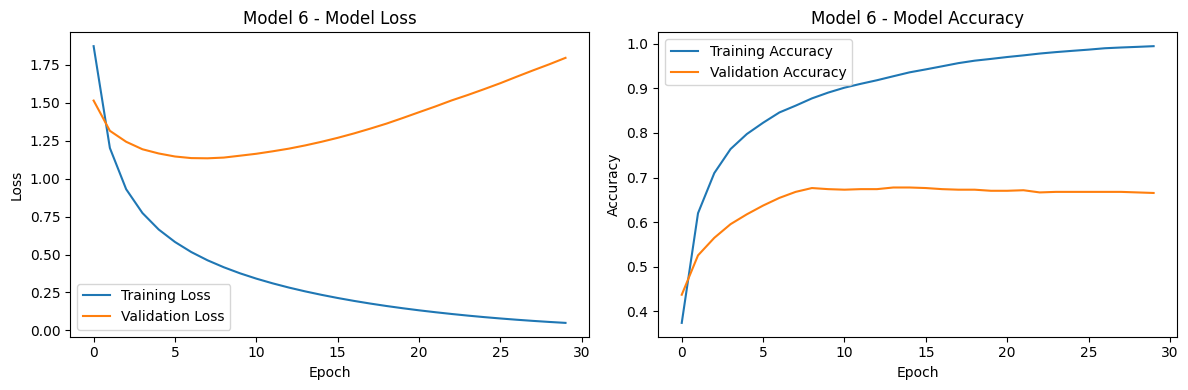


Final Validation Metrics:
Validation Accuracy: 0.6654
Validation Loss: 1.7964


In [43]:
features, labels = load_and_prepare_data()

results_model6 = evaluate_first_fold(create_model_6, features, labels, "Model 6")

### 1.1 Activation functions

In [153]:
def create_model_1_2(input_shape, learning_rate=0.0001):
    """Wide MLP with 2 hidden layers (128 -> 64)"""
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2499 - loss: 2.0668 - val_accuracy: 0.4498 - val_loss: 1.5266
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5478 - loss: 1.4032 - val_accuracy: 0.5257 - val_loss: 1.3240
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6462 - loss: 1.1567 - val_accuracy: 0.5784 - val_loss: 1.2103
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7044 - loss: 1.0056 - val_accuracy: 0.6115 - val_loss: 1.1383
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.7423 - loss: 0.9022 - val_accuracy: 0.6225 - val_loss: 1.0906
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.7619 - loss: 0.8254 - val_accuracy: 0.6324 - val_loss: 1.0572
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7759 - loss: 0.7660 - val_accuracy: 0.6446 - val_loss: 1.0332
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.7882 - loss: 0.7169 - val_accura

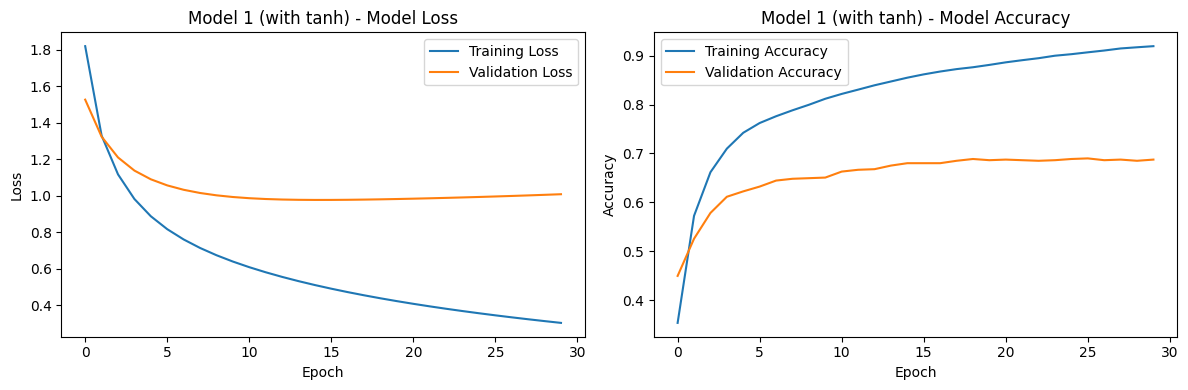


Final Validation Metrics:
Validation Accuracy: 0.6875
Validation Loss: 1.0089


In [48]:
features, labels = load_and_prepare_data()

results_model1_2 = evaluate_first_fold(create_model_1_2, features, labels, "Model 1 (with tanh)")

## 2. Training strategies

### 2.1. Optimizer

In [54]:
def create_model_rmsprop(input_shape, learning_rate=0.0001):
    """Model with RMSprop optimizer"""
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

def create_model_sgd(input_shape, learning_rate=0.001):
    """Model with SGD optimizer with momentum"""
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate, momentum=0.9),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

def create_model_adamw(input_shape, learning_rate=0.0001):
    """Model with AdamW optimizer (Adam with weight decay)"""
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.AdamW(learning_rate, weight_decay=0.01),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

def create_model_adadelta(input_shape, learning_rate=1.0):  
    """Model with Adadelta optimizer"""
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adadelta(learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2508 - loss: 2.0167 - val_accuracy: 0.4890 - val_loss: 1.5452
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.5527 - loss: 1.3527 - val_accuracy: 0.5772 - val_loss: 1.3187
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6557 - loss: 1.1020 - val_accuracy: 0.6066 - val_loss: 1.2102
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.7073 - loss: 0.9610 - val_accuracy: 0.6397 - val_loss: 1.1500
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.7417 - loss: 0.8669 - val_accuracy: 0.6495 - val_loss: 1.1124
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7644 - loss: 0.7972 - val_accuracy: 0.6569 - val_loss: 1.0872
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.7788 - loss: 0.7423 - val_accuracy: 0.6679 - val_loss: 1.0698
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.7904 - loss: 0.6966 - val_ac

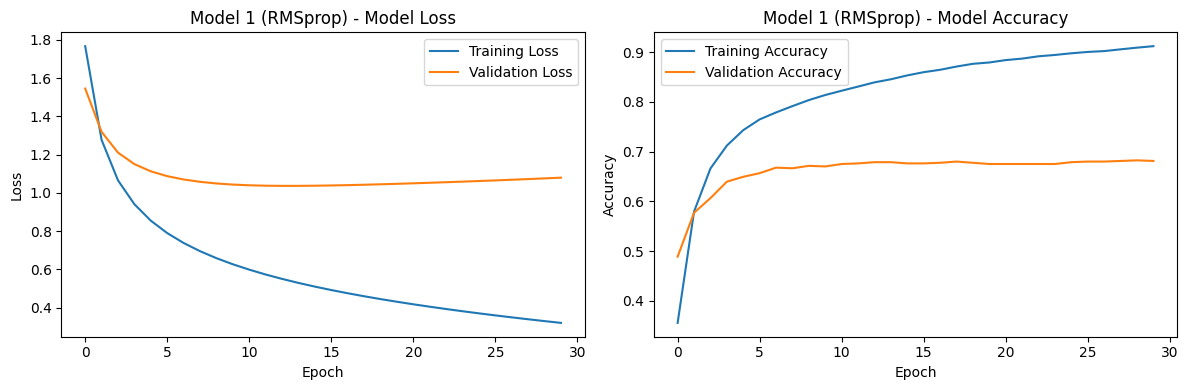


Final Validation Metrics:
Validation Accuracy: 0.6814
Validation Loss: 1.0793


In [52]:
features, labels = load_and_prepare_data()

results_rmsprop = evaluate_first_fold(create_model_rmsprop, features, labels, "Model 1 (RMSprop)")

Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2846 - loss: 2.0137 - val_accuracy: 0.5147 - val_loss: 1.4689
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6217 - loss: 1.2336 - val_accuracy: 0.5613 - val_loss: 1.2968
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6881 - loss: 1.0131 - val_accuracy: 0.5895 - val_loss: 1.2181
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.7305 - loss: 0.8886 - val_accuracy: 0.6005 - val_loss: 1.1719
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.7561 - loss: 0.8028 - val_accuracy: 0.6152 - val_loss: 1.1409
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.7829 - loss: 0.7377 - val_accuracy: 0.6336 - val_loss: 1.1191
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.8002 - loss: 0.6860 - val_accuracy: 0.6446 - val_loss: 1.1033
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.8096 - loss: 0.6428 - val_ac

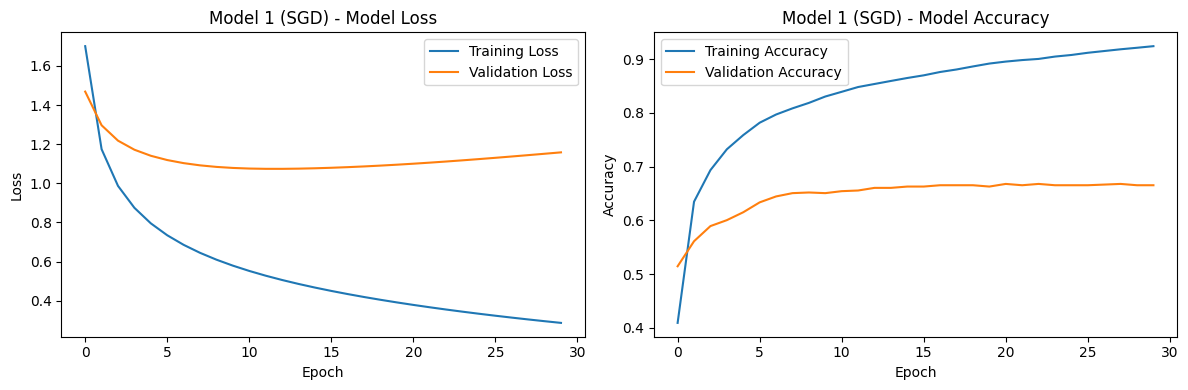


Final Validation Metrics:
Validation Accuracy: 0.6654
Validation Loss: 1.1584


In [55]:
features, labels = load_and_prepare_data()

results_sgd = evaluate_first_fold(create_model_sgd, features, labels, "Model 1 (SGD)")

Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2774 - loss: 2.0026 - val_accuracy: 0.4326 - val_loss: 1.6195
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.5591 - loss: 1.3612 - val_accuracy: 0.5123 - val_loss: 1.3966
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.6489 - loss: 1.1264 - val_accuracy: 0.5441 - val_loss: 1.2818
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.7104 - loss: 0.9854 - val_accuracy: 0.5674 - val_loss: 1.2125
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.7417 - loss: 0.8875 - val_accuracy: 0.5833 - val_loss: 1.1671
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7633 - loss: 0.8136 - val_accuracy: 0.5980 - val_loss: 1.1364
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.7811 - loss: 0.7549 - val_accuracy: 0.6115 - val_loss: 1.1155
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.7936 - loss: 0.7068 - val_

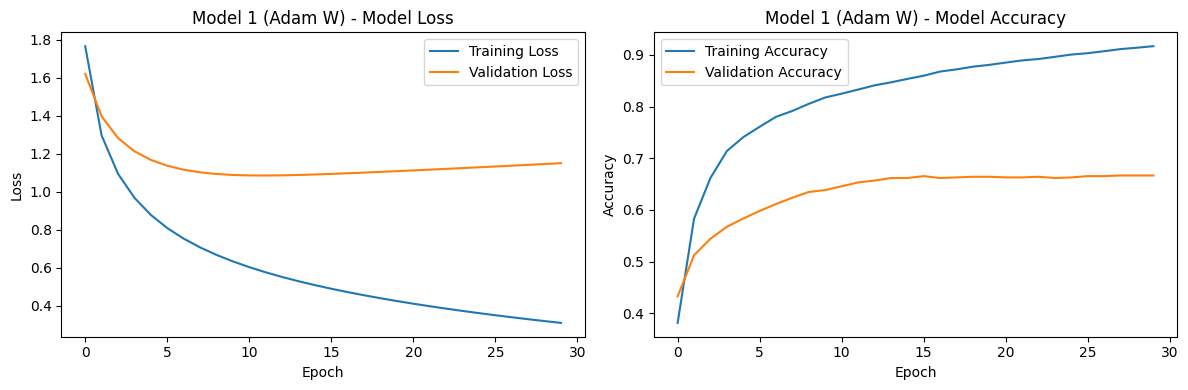


Final Validation Metrics:
Validation Accuracy: 0.6667
Validation Loss: 1.1499


In [57]:
features, labels = load_and_prepare_data()

results_adamw = evaluate_first_fold(create_model_adamw, features, labels, "Model 1 (Adam W)")

Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5554 - loss: 1.3236 - val_accuracy: 0.6581 - val_loss: 1.0654
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.8037 - loss: 0.6318 - val_accuracy: 0.6630 - val_loss: 1.0847
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8570 - loss: 0.4792 - val_accuracy: 0.6654 - val_loss: 1.1200
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.8886 - loss: 0.3804 - val_accuracy: 0.6716 - val_loss: 1.1554
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.9115 - loss: 0.3073 - val_accuracy: 0.6654 - val_loss: 1.1964
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.9298 - loss: 0.2497 - val_accuracy: 0.6544 - val_loss: 1.2443
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.9452 - loss: 0.2034 - val_accuracy: 0.6483 - val_loss: 1.2908
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.9571 - loss: 0.1656 - val_

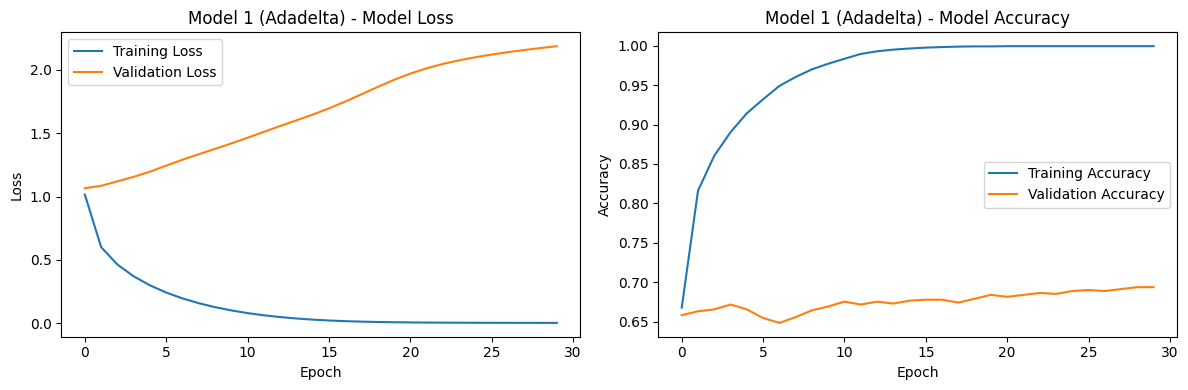


Final Validation Metrics:
Validation Accuracy: 0.6936
Validation Loss: 2.1873


In [58]:
features, labels = load_and_prepare_data()

results_adadelta = evaluate_first_fold(create_model_adadelta, features, labels, "Model 1 (Adadelta)")

### 2.2. Mini-bacth size and number of epochs

Epoch 1/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1786 - loss: 2.1955 - val_accuracy: 0.4461 - val_loss: 1.6612
Epoch 2/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.4532 - loss: 1.5770 - val_accuracy: 0.5233 - val_loss: 1.4522
Epoch 3/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5704 - loss: 1.3323 - val_accuracy: 0.5723 - val_loss: 1.3361
Epoch 4/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6359 - loss: 1.1774 - val_accuracy: 0.5993 - val_loss: 1.2589
Epoch 5/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6833 - loss: 1.0668 - val_accuracy: 0.6140 - val_loss: 1.2022
Epoch 6/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7134 - loss: 0.9822 - val_accuracy: 0.6225 - val_loss: 1.1577
Epoch 7/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7359 - loss: 0.9132 - val_accuracy: 0.6360 - val_loss: 1.1214
Epoch 8/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7486 - loss: 0.8575 - val_accuracy: 

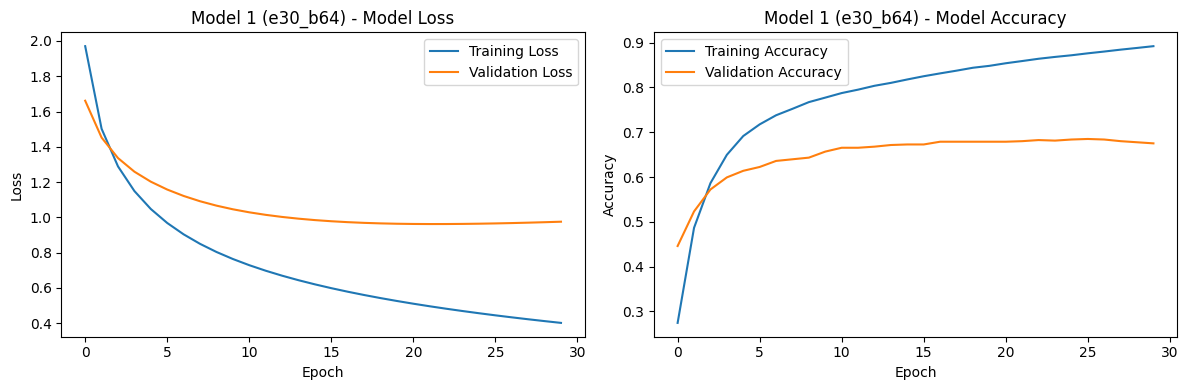


Final Validation Metrics:
Validation Accuracy: 0.6752
Validation Loss: 0.9754


In [62]:
features, labels = load_and_prepare_data()

# Combination 1: Epochs=30, Batch_size=64
results_1 = evaluate_first_fold(create_model_1_2, features, labels, "Model 1 (e30_b64)", epochs=30, batch_size=64)

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1903 - loss: 2.2613 - val_accuracy: 0.3199 - val_loss: 1.8298
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3509 - loss: 1.7615 - val_accuracy: 0.4387 - val_loss: 1.5896
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4765 - loss: 1.5302 - val_accuracy: 0.4890 - val_loss: 1.4457
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5507 - loss: 1.3721 - val_accuracy: 0.5257 - val_loss: 1.3437
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6028 - loss: 1.2524 - val_accuracy: 0.5502 - val_loss: 1.2671
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6387 - loss: 1.1583 - val_accuracy: 0.5772 - val_loss: 1.2078
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6680 - loss: 1.0823 - val_accuracy: 0.5919 - val_loss: 1.1608
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6902 - loss: 1.0201 - val_accuracy: 0.6054 - val_loss:

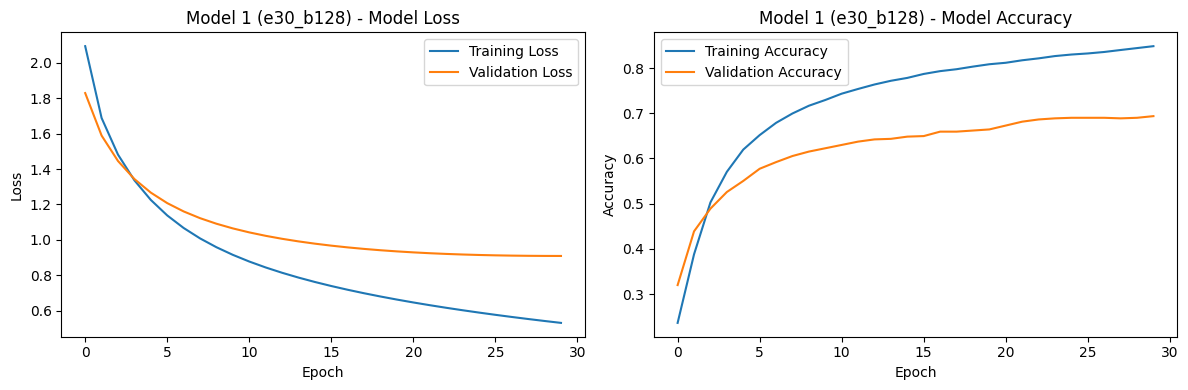


Final Validation Metrics:
Validation Accuracy: 0.6936
Validation Loss: 0.9091


In [63]:
features, labels = load_and_prepare_data()

# Combination 2: Epochs=30, Batch_size=128
results_2 = evaluate_first_fold(create_model_1_2, features, labels, "Model 1 (e30_b128)", epochs=30, batch_size=128)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1341 - loss: 2.3421 - val_accuracy: 0.3689 - val_loss: 1.8414
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3770 - loss: 1.7834 - val_accuracy: 0.4510 - val_loss: 1.5928
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5034 - loss: 1.5286 - val_accuracy: 0.5086 - val_loss: 1.4500
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5796 - loss: 1.3621 - val_accuracy: 0.5417 - val_loss: 1.3547
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6277 - loss: 1.2407 - val_accuracy: 0.5600 - val_loss: 1.2864
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6603 - loss: 1.1476 - val_accuracy: 0.5699 - val_loss: 1.2348
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6880 - loss: 1.0735 - val_accuracy: 0.5870 - val_loss: 1.1939
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7071 - loss: 1.0119 - val_accuracy: 0.5993 - val_loss:

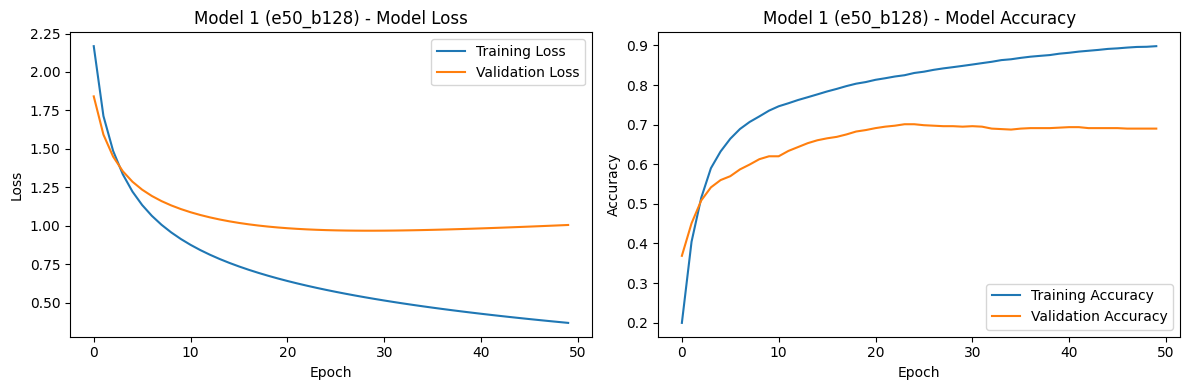


Final Validation Metrics:
Validation Accuracy: 0.6900
Validation Loss: 1.0053


In [64]:
features, labels = load_and_prepare_data()

# Combination 4: Epochs=50, Batch_size=128
results_4 = evaluate_first_fold(create_model_1_2, features, labels, "Model 1 (e50_b128)", epochs=50, batch_size=128)

### Other Tecnhiques

In [148]:
def create_model_l2(input_shape, learning_rate=0.0001, l2_lambda=0.001):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(128, activation='tanh', 
                            kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)),
        tf.keras.layers.Dense(64, activation='tanh',
                            kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1612 - loss: 2.5185 - val_accuracy: 0.2623 - val_loss: 2.2002
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3359 - loss: 2.0318 - val_accuracy: 0.3909 - val_loss: 1.9684
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4646 - loss: 1.7987 - val_accuracy: 0.4547 - val_loss: 1.8251
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5521 - loss: 1.6314 - val_accuracy: 0.4988 - val_loss: 1.7222
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6013 - loss: 1.5042 - val_accuracy: 0.5208 - val_loss: 1.6433
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6407 - loss: 1.4047 - val_accuracy: 0.5429 - val_loss: 1.5804
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6682 - loss: 1.3256 - val_accuracy: 0.5613 - val_loss: 1.5290
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6945 - loss: 1.2601 - val_accuracy: 0.5662 - val_loss:

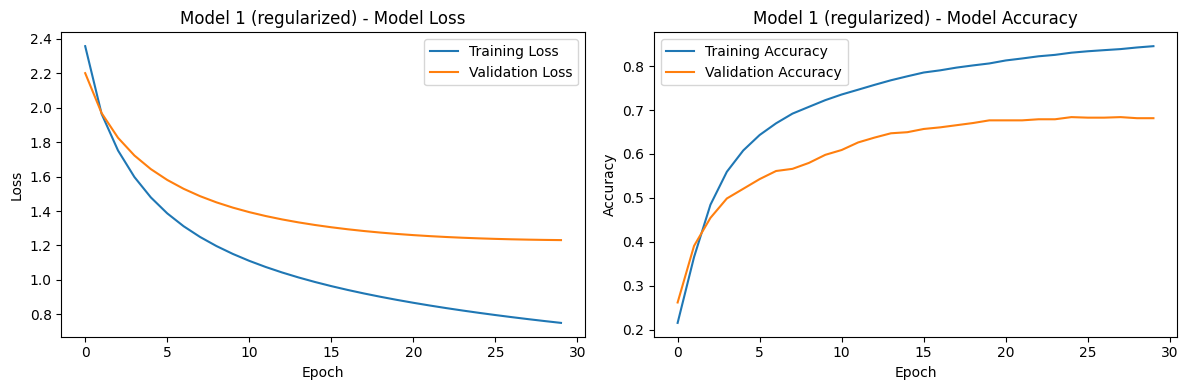


Final Validation Metrics:
Validation Accuracy: 0.6814
Validation Loss: 1.2312


In [150]:
features, labels = load_and_prepare_data()

results = evaluate_first_fold(create_model_l2, features, labels, "Model 1 (regularized)", epochs=30, batch_size=128)

In [144]:
def create_model_dropout(input_shape, learning_rate=0.0001):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1501 - loss: 2.3285 - val_accuracy: 0.3076 - val_loss: 1.9085
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3013 - loss: 1.8978 - val_accuracy: 0.4314 - val_loss: 1.6741
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3984 - loss: 1.6792 - val_accuracy: 0.5012 - val_loss: 1.5363
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4638 - loss: 1.5132 - val_accuracy: 0.5453 - val_loss: 1.4363
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5149 - loss: 1.3949 - val_accuracy: 0.5772 - val_loss: 1.3614
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5591 - loss: 1.3027 - val_accuracy: 0.6005 - val_loss: 1.3032
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5959 - loss: 1.2251 - val_accuracy: 0.6103 - val_loss: 1.2563
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6154 - loss: 1.1595 - val_accuracy: 0.6250 - val_loss:

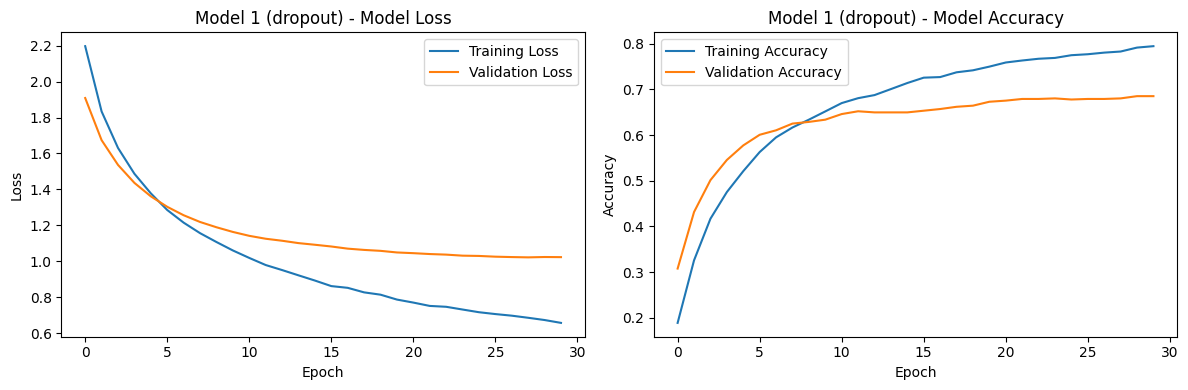


Final Validation Metrics:
Validation Accuracy: 0.6850
Validation Loss: 1.0231


In [145]:
features, labels = load_and_prepare_data()

results = evaluate_first_fold(create_model_dropout, features, labels, "Model 1 (dropout)", epochs=30, batch_size=128)

In [146]:
def create_model_combined(input_shape, learning_rate=0.0001, l2_lambda=0.001):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(128, activation='tanh', 
                            kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='tanh',
                            kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1562 - loss: 2.5717 - val_accuracy: 0.2782 - val_loss: 2.2161
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3122 - loss: 2.1012 - val_accuracy: 0.3725 - val_loss: 1.9920
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4232 - loss: 1.8756 - val_accuracy: 0.4363 - val_loss: 1.8511
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4814 - loss: 1.7222 - val_accuracy: 0.4632 - val_loss: 1.7489
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5476 - loss: 1.5981 - val_accuracy: 0.4890 - val_loss: 1.6702
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5688 - loss: 1.5097 - val_accuracy: 0.5270 - val_loss: 1.6077
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6169 - loss: 1.4285 - val_accuracy: 0.5429 - val_loss: 1.5588
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6390 - loss: 1.3701 - val_accuracy: 0.5625 - val_loss:

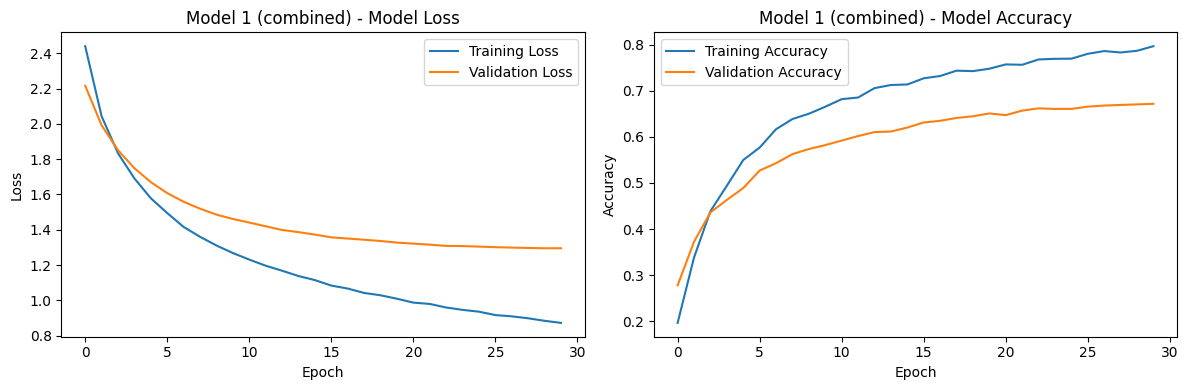


Final Validation Metrics:
Validation Accuracy: 0.6716
Validation Loss: 1.2954


In [147]:
features, labels = load_and_prepare_data()

results = evaluate_first_fold(create_model_combined, features, labels, "Model 1 (combined)", epochs=30, batch_size=128)

In [156]:
def load_and_prepare_data():
    """Load features and labels from saved CSV files."""
    features = []
    labels = []

    for fold in range(1, 11):
        data = pd.read_csv(f'features_mlp/fold{fold}_features_normalized.csv')
        features.append(data.iloc[:, :172].values)  # First 172 columns are features
        labels.append(data['label'].values)

    return features, labels

def evaluate_first_fold_early(model_function, features, labels, model_name="Model", epochs=100, batch_size=128, seed=42):
    tf.keras.backend.clear_session()
    tf.random.set_seed(seed)
    
    # Using folds 1-8 for training, 9 for validation
    train_folds = list(range(8))
    val_fold = 8  # Fold 9
    
    train_features = np.concatenate([features[f] for f in train_folds])
    train_labels = np.concatenate([labels[f] for f in train_folds])
    val_features = features[val_fold]
    val_labels = labels[val_fold]
    
    model = model_function(train_features.shape[1])
    
    # Early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',           # Monitor validation loss
        patience=5,                   # Number of epochs with no improvement
        restore_best_weights=True,    # Restore model weights from the epoch with the best value
        verbose=1                     # Print message when early stopping is triggered
    )
    
    history = model.fit(
        train_features, train_labels,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(val_features, val_labels),
        callbacks=[early_stopping],
        verbose=1
    )
    
    plt.figure(figsize=(12, 4))
    
    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Get best validation metrics
    best_epoch = np.argmin(history.history['val_loss'])
    best_val_acc = history.history['val_accuracy'][best_epoch]
    best_val_loss = history.history['val_loss'][best_epoch]
    
    print(f"\nBest Validation Metrics (Epoch {best_epoch + 1}):")
    print(f"Validation Accuracy: {best_val_acc:.4f}")
    print(f"Validation Loss: {best_val_loss:.4f}")
    
    return history

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1431 - loss: 2.3577 - val_accuracy: 0.2978 - val_loss: 1.9581
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3695 - loss: 1.8046 - val_accuracy: 0.3958 - val_loss: 1.7089
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4774 - loss: 1.5594 - val_accuracy: 0.4436 - val_loss: 1.5650
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5530 - loss: 1.3956 - val_accuracy: 0.4779 - val_loss: 1.4634
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6013 - loss: 1.2721 - val_accuracy: 0.5098 - val_loss: 1.3868
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6352 - loss: 1.1749 - val_accuracy: 0.5392 - val_loss: 1.3269
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6616 - loss: 1.0968 - val_accuracy: 0.5564 - val_loss: 1.2787
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6877 - loss: 1.0327 - val_accuracy: 0.5821 - v

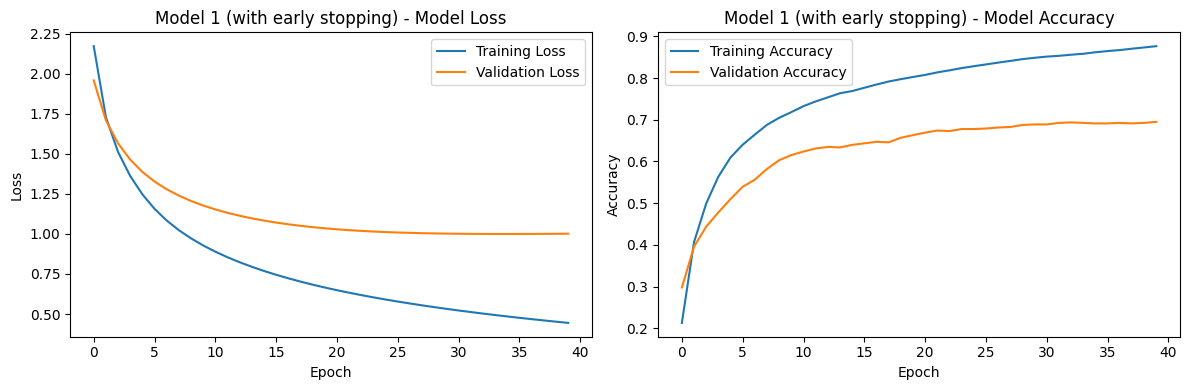


Best Validation Metrics (Epoch 35):
Validation Accuracy: 0.6912
Validation Loss: 0.9998


In [159]:
features, labels = load_and_prepare_data()

results_model1_2 = evaluate_first_fold_early(create_model_1_2, features, labels, "Model 1 (with early stopping)")